# Weight Initialization Techniques for Deep Learning in Keras
* notebook by Adam Lang
* Date: 2/26/2024

# Weight Initialization Techniques to improve performace of neural networks
1. Random Normal Initialization
* Initializes weights and biases that follow a normal distribution.
* Example: mean=0, standard deviation=0.05
---------------------------------------------------------------------------

2. Glorot Normal Initialization/Xavier Normal Initialization
* First proposed in this paper "Understanding the difficulty of training deep feedforward neural network." link to paper:  original paper: https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
* Technique initializes weights and biases that follow the "Xavier Normal Distribution"
* What is the "Xavier Normal Distribution"
    * mean = 0
    * standard deviation = sqrt((2 / fan_in + fan_out))
    * `fan_in` is number of input neurons in the weights and bias matrices
    * `fan_out` is the number of output neurons in weight and bias matrices
--------------------------------------------------------------------------
3. He Normal Initialization
* From the paper, "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification", original paper: https://arxiv.org/pdf/1502.01852.pdf
* Draws samples from a distribution with:
    * mean = 0
    * standard deviation = sqrt(w / fan_in)
    * `fan_in` is number of input neurons in weights and bias matrices

---------------------------------------------------------------------------
4. Keras Initializers
* Documentation: https://keras.io/api/layers/initializers/
    a. Zeros()
        * all w and b values to zero.
    b. Ones()
        * all w and b values to one.
    c. Constant
        * all w and b values to a constant value.
        * example: keras.initalizers.Constant(value=0)
    d. RandomNormal
        * normal distribution
        * example: keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
    e. RandomUniform
        * uniform distribution with a given range
        * example: keras.initializers.RandomUniform(minval=0.05, maxval=0.05, seed=None)
    f. ....there are other less common initializers in the documentation

# Steps to solve image classificaiton problem of Emergency vs. Non-emergency vehicles using `Weight Initialization` techniques
1. Load dataset
2. Pre-processing dataset
3. Create training and validation sets
4. Define model architecture => **Setting up weight initialization technique**
5. Compile model
6. Train model
7. Evalute model performance

# 1. Load dataset

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# layer imports from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# import adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train test_split to create training and validation sets
from sklearn.model_selection import train_test_split
# accuracy_score to calculate accuracy of predictions
from sklearn.metrics import accuracy_score

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### use git commands in colab to get to fold and unzip files

In [3]:
ls

drive/  sample_data/


In [11]:
cd Deep\ Learning\ Notebooks

/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks


In [12]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg  
  inflating: Dataset/

In [13]:
# read in csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning Notebooks/Dataset/emergency_classification.csv')

In [14]:
# define seed value so results are reproducible
seed = 42

In [15]:
# view first 5 rows of dataset
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [16]:
# now load the images and store in numpy array

# initialize empty list to store images
X = []
# iterate over each image
for img_name in data.image_names:
  # load image using its name
  img = plt.imread('Dataset/images/' + img_name)
  # saving each image in the list
  X.append(img)

  # converting the list of images into numpy array
X=np.array(X)

  # storing targt variable in separate variable
y = data.emergency_or_not.values

In [17]:
# shape of images
X.shape

(2352, 224, 224, 3)

summary:
* 2,352 images
* 224 x 224 x 3 for image shapes

# 2. Pre-processing the data

In [18]:
# converting 3 dim image to 1 dim image shape
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [19]:
# min and max pixel values of images
X.min(), X.max()

(0, 255)

In [20]:
# normailizing pixel values
X = X / X.max()

In [21]:
# min and max pixel values of images after normalization
X.min(), X.max()

(0.0, 1.0)

# 3. Create training and validation set

In [22]:
# create training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=seed)

In [23]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

# 4. Define model architecture
* Setting up the `Weight initialization technique`

In [24]:
# import different initialization techniques
from keras.initializers import random_normal, glorot_normal, he_normal

In [25]:
# examples of how to use each weight initialization technique

### random_normal
# kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed)

### glorot normal
# kernel_initializer=glorot_normal(seed=seed)

### he_normal
# kernel_initializer=he_normal(seed=seed)

### We will test out all 3 techniques and show results at the bottom of notebook.

In [32]:
# define the model architecture
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,))) # input layer with input shape
model.add(Dense(100, activation='sigmoid', kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed))) # hidden layer 1 with he_normal
model.add(Dense(100, activation='sigmoid', kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed))) # hidden layer 2 with he_normal
model.add(Dense(units=1, activation='sigmoid', kernel_initializer=random_normal(mean=0, stddev=0.05, seed=seed))) #output layer

# 5. Compile model

In [33]:
# defining adam optimizer and setting learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [34]:
# compile model

# defining loss as binary crossentropy => this is a binary classifcation problem!
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# 6. Train model

In [35]:
# train model for 30 epochs
model_history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/30
13/13 [==============================] - 3s 192ms/step - loss: 0.6901 - accuracy: 0.5450 - val_loss: 0.6874 - val_accuracy: 0.5609
Epoch 2/30
13/13 [==============================] - 1s 113ms/step - loss: 0.6823 - accuracy: 0.5863 - val_loss: 0.6848 - val_accuracy: 0.5609
Epoch 3/30
13/13 [==============================] - 1s 88ms/step - loss: 0.6788 - accuracy: 0.5863 - val_loss: 0.6833 - val_accuracy: 0.5609
Epoch 4/30
13/13 [==============================] - 1s 108ms/step - loss: 0.6768 - accuracy: 0.5863 - val_loss: 0.6817 - val_accuracy: 0.5609
Epoch 5/30
13/13 [==============================] - 1s 88ms/step - loss: 0.6753 - accuracy: 0.5863 - val_loss: 0.6802 - val_accuracy: 0.5609
Epoch 6/30
13/13 [==============================] - 2s 194ms/step - loss: 0.6738 - accuracy: 0.5863 - val_loss: 0.6791 - val_accuracy: 0.5609
Epoch 7/30
13/13 [==============================] - 2s 163ms/step - loss: 0.6724 - accuracy: 0.5863 - val_loss: 0.6777 - val_accuracy: 0.5609
Epoch 8/

# 8. Evaluate the model's performance

In [36]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0, 1)))

23/23 [==============================] - 0s 10ms/step
Accuracy on validation set: 0.6458923512747875


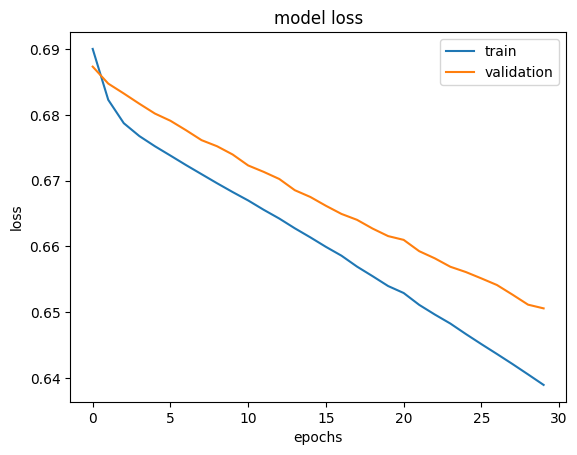

In [37]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Comparison of 3 weight initialization techniques

### he_normal
* trained for 30 epochs.
* Accuracy on validation set: 0.7082152974504249
* Plot below shows the result using `he_normal`. Around 7 epochs the model starting overfitting the data as the loss increased.



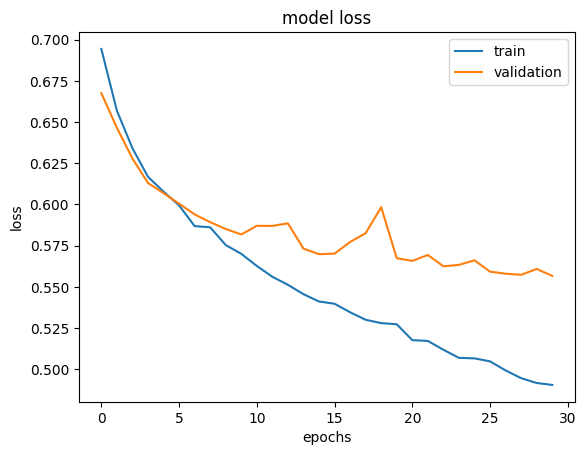

### glorot_normal
* trained for 30 epochs
* Accuracy on validation set: 0.7110481586402266
* Plot below shows the result using the `glorot_normal` function. Similar findings to the `he_normal`.


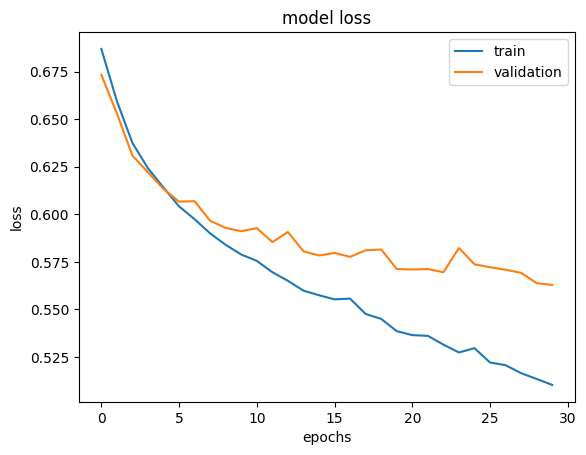

### random_normal
* trained for 30 epochs.
* Accuracy on validation set: 0.6458923512747875
* We can see the plot below for the `random_normal` which uses a normal distribution for the weight initialization. The accuracy was less, although the plot below shows us that there was significantly less overfitting of the validation set as the loss continued to decrease with each epoch similar to the training data.
* Thus we can say that using the `random_normal` weights initialization outperformed the other 2 methods when trained for more epochs.
* However, we can say that using the 2 methods above, we had more accuracy with less epochs of running the model. My general takeaway is that if we want to train for more epochs we should first consider the `random_normal` distribution.

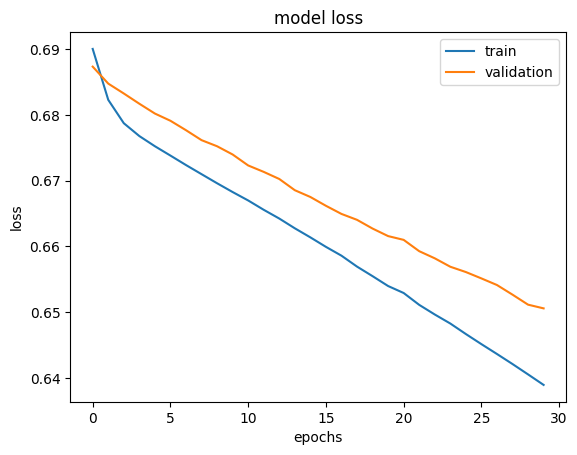